# Bayesian Data Analysis

Put intro here...

## Approaches to Data Analysis

><i>"All models are wrong, but some are useful"</i> -- George Box

### 1. Exploratory
><p>Descriptive statistics without any probabilistic assumptions
><p>Examples include: Average, Median, Quantiles, Range, Variance, Minimum/Maximum, Histogram, and various other plots and charts

### 2. Frequentist
><p>Assumes a probability model with a fixed, deterministic parameter</p>
><p>$X \sim F(x;\theta)$</p>
><p>(quantities can be scalars or vectors)</p>

### 3. Bayesian
><p>Assumes a probability model with a random parameter that has its own model</p>
><p>$X \sim F(x;\Theta)$ called the "Likelihood Distribution"</p>
><p>$\Theta \sim G(\theta;\gamma)$ called the "Prior Distribution"</p>
><p>$\gamma$ is called a "hyperparameter" and is usually deterministic</p>

To make inferences about a model, Frequentist or Bayesian, it is necessary to estimate the parameter (scalar or vector) of the model, $\theta$.  In the Frequentist case, the Maximum Likelihood Estimate (MLE) is typically derived. It's a "point" estimate (scalar or vector).  For the Bayesian case, the conditional probability distribution of 

## Beta-Binomial Example

For the <i>Likelihood</i> and <i>Prior</i> distributions, below, the <i>Posterior</i> distribution can be derived analytically. In fact, the Prior and Posterior are from the same family of distributions, the Beta distribution.  When this occurs, we say that the prior and posterior are <i>conjugate distributions</i>.

### The Data

Assume that we've conducted $n$ binomial trials with an unknown probability of success, $\theta$, and that we've observed $k_{obs}$ successes:

In [2]:
n = 20  # Number of trials
k_obs = 6  # Number of observed successes in n trials

### The Bayesian Beta-Binomial Model

#### Likelihood:
>Probabilistic model of the data
><p>$K \sim Binomial_n(k;\Theta) \equiv \binom{n}{k} \Theta^k(1-\Theta)^{n-k}$</p>

#### Prior:
>Probabilistic model of the likelihood model parameter(s)
><p>$\Theta \sim Beta(\theta; \alpha, \beta) \equiv \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} \theta^{\alpha - 1} (1-\theta)^{\beta - 1}$</p>
><p>For this example, assume $\Theta \sim Beta(1, 1)$, which is equivalent to the uniform distribution:
><p>$Beta(1,1) \equiv U(0,1)$</p>

#### Posterior
>Probabilistic model of the parameter(s), given the observed data
><p>According to Bayes Theorem, <b>Posterior $\propto$ Likelihood $\times$ Prior</b>
><p>So, after some algebraic manipulation we have,
><p>$(\Theta \mid K=k) \sim Beta(\theta; \alpha+k, \beta+n-k)$</p>

Often, simulation is required to obtain an approximation to the posterior distribution. For the Beta-Binomial model that is not necessary, however, since we have an analytical expression for the posterior probability density, as shown above.

So, for the data provided above we have:
><p>$(\Theta \mid K=k_{obs}) \sim Beta(\theta; 1+k_{obs}, 1+n-k_{obs})$</p>

The posterior PDF is plotted below.

In [5]:
from scipy.stats import uniform, binom, beta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

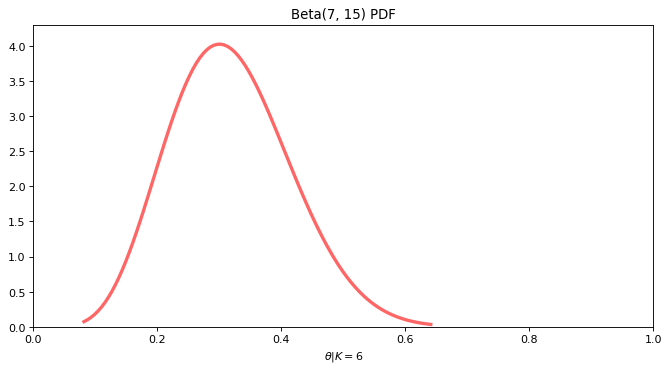

In [11]:
beta_parameters = (1+k_obs, 1+n-k_obs)

x = np.linspace(beta.ppf(0.001, *beta_parameters), beta.ppf(0.999, *beta_parameters), 100)
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
#plt.xlabel(r"$\theta | K = k_{obs}$")
plt.xlabel(r"$\theta | K = $" + f"{k_obs}")
#plt.title(f"Beta({1+k_obs}, {1+n-k_obs}) PDF")
plt.title(f"Beta{beta_parameters} PDF")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 4.3)
_ = plt.plot(x, beta.pdf(x, *beta_parameters), 'r-', lw=3, alpha=0.6)

## Calculating the Posterior by Simulation

The following provides a very simple approach (no MCMC) to computing the posterior PDF using simulation.

In [7]:
m = 500_000  # Number of priors

priors = uniform.rvs(size=m)
%time posteriors = [theta for theta in priors if binom.rvs(n, theta)==k_obs]

print(f"\nThere were {len(posteriors)} matches out of {m} priors. (Only {100*len(posteriors)/m:0.2}% matched)")

CPU times: user 18.1 s, sys: 140 ms, total: 18.3 s
Wall time: 17.7 s

There were 23662 matches out of 500000 priors. (Only 4.7% matched)


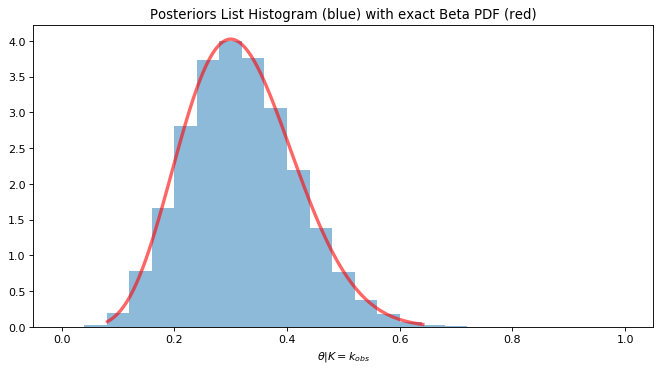

In [15]:
hbins = 25
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel(r"$\theta | K = k_{obs}$")
plt.title(f"Posteriors List Histogram (blue) with exact Beta PDF (red)")
plt.plot(x, beta.pdf(x, *beta_parameters), 'r-', lw=3, alpha=0.6)
_ = plt.hist(posteriors, bins=hbins, density=True, range=[0.0, 1.0], alpha=0.5)

In [1]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()